### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? 

In [34]:
import numpy as np
import pandas as pd
import math
import statistics
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [35]:
# t_score for sampling distributions

def t_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / math.sqrt(sample_size)
    return numerator / denomenator

$ Step - 1: \\ $
$ Alternate \ Hypothesis   H_1  : $
$$  \mu \neq 500 \\ $$

$ Null \ Hypothesis  H_0 : \\ $

$$ \mu = 500 \\ $$

$ Step - 2: $ 

$ Collect \ a \ sample \ of \ size \ n = 10 \\ $  
$$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] \\ $$
$ Compute \ sample \ mean $
$$ \bar{x} \ = \ 465.3 \\$$ 
$ Step - 3: Compute Test Statistic:$
$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}} \\ $$
$ Step \ - \ 4: \ Decide \ \alpha \ or \ significance \ level \\ $

$ Step - 5 \\ $ 
$1)\ t-test \\
   \ or \\
2) \  Compute \  p-value\\ $

In [36]:
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
statistics.mean(l)

465.3

In [37]:
# Two tail
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 19)

print(t_critical)

2.093024054408263


In [38]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500
pop_std = statistics.stdev(l)

In [39]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, pop_std)

print(t)

-1.263475128444671


Text(465.3, 0.0007, 'x_bar')

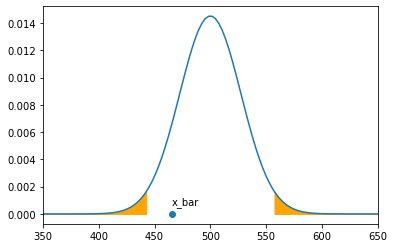

In [40]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 350
x_max = 650


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [41]:
# Conclusion using  test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [42]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.10320923971909068
Fail to reject Null Hypothesis


### Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

$ Step - 1: \\ $
$ Alternate \ Hypothesis   H_1  : $
$$  \mu > 4 \\ $$

$ Null \ Hypothesis  H_0 : \\ $

$$ \mu \leq 4 \\ $$

$ Step - 2: $ 

$  Collect \ a \ sample \ of \ size \ n = 10 \\ $  
$$  [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] \\ $$
$  Compute \ sample \ mean $
$$ \bar{x} \ = \ 4.25 \\$$ 
$ Step - 3: Compute Test Statistic:$
$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}} \\ $$
$ Step \ - \ 4: \ Decide \ \alpha \ or \ significance \ level \\ $

$ Step - 5 \\ $ 
$1)\ t-test \\
   \ or \\
2) \  Compute \  p-value\\ $

In [58]:
k = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
statistics.mean(k)

4.25

In [59]:
statistics.stdev(k)

0.8506963092234007

In [60]:
# One Tail - Calculating the z-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha)

print(z_critical)

1.6448536269514722


In [61]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 4.25
pop_mean = 4
pop_std = 0.8506963092234007

In [62]:
t = t_score(sample_size, sample_mean, pop_mean, pop_std)

print(t)

1.3142574813455419


Text(4.25, 0.1, 'x_bar')

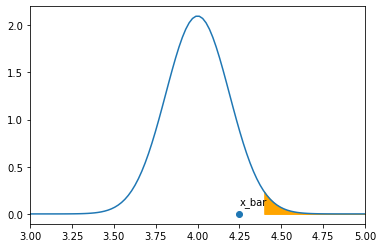

In [63]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.0
x_max = 5.0


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [49]:
# Conclusion using z test

if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [50]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.09437978527056279
Fail to reject Null Hypothesis


### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Step - 1:
Alternate Hypothesis (Bold Claim):
$$ H_1: \mu > 15 $$
Null Hypothesis (Status Quo):
$$ H_0: \mu \leq 15 ? $$

$ Step - 2:  $

$ Collect \ a \  sample \ of \  size \\ $
$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] \\ $
$ Compute  \ sample \ mean $ 
$$ \bar{x} \ = \ 15.099 \\ $$
$ Step \ - \ 4: \ Decide \ \alpha \ or \ significance \ level \\ $

$ Step - 5 \\ $ 
$1)\ t-test \\
   \ or \\
2) \  Compute \  p-value\\ $


In [64]:
l = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
print(statistics.mean(l))

15.099


In [65]:
# One Tail

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = norm.ppf(1 - alpha)

print(t_critical)

1.6448536269514722


In [66]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15
pop_std = statistics.stdev(l)
print(pop_std)

1.0253671999517258


In [67]:
t = t_score(sample_size, sample_mean, pop_mean, pop_std)

print(t)

0.43614969887959276


Text(15.1, 0.1, 'x_bar')

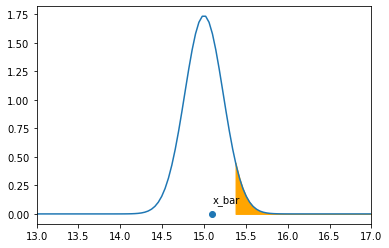

In [71]:
x_min = 13
x_max = 17

mean = pop_mean
std = pop_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the acceptance region
# i.e. Fail to Reject the Null Hypothesis

In [72]:
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [73]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.3313640603103363
Fail to reject Null Hypothesis


### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? (Based on past data you know that the std is 10 ms)

$ Step - 1: $

$ Alternate \ Hypothesis (Bold Claim): \\ $
$$ H_1: \mu < 100 \\ $$
$ Null \ Hypothesis (Status Quo): \\ $
$$ H_0: \mu \geq 100 \\ $$

$ Step - 2: $ 

$ Collect \ a \ sample \ of \ size \ n = 100 \\ $
$ Compute \ sample \ mean $
$$ \bar{x} \ = \ 100.05 $$
$ Step \ - \ 4: \ Decide \ \alpha \ or \ significance \ level \\ $
$ Step - 5 \\ $ 
$1)\ t-test \\
   \ or \\
2) \  Compute \  p-value\\ $

In [74]:
import random
random.seed(10)
ran = []
for i in range(100):
    x = random.randint(95,105)
    ran.append(x)
    
print(ran)

[104, 95, 101, 102, 104, 95, 98, 102, 102, 99, 105, 97, 95, 103, 102, 100, 96, 98, 100, 95, 101, 97, 104, 100, 101, 101, 99, 105, 99, 102, 97, 105, 99, 105, 100, 97, 102, 98, 102, 104, 101, 95, 104, 95, 98, 97, 98, 99, 103, 100, 98, 100, 105, 103, 102, 101, 102, 96, 105, 104, 100, 103, 97, 98, 101, 98, 95, 95, 102, 99, 104, 105, 96, 103, 96, 97, 101, 104, 100, 104, 97, 96, 96, 102, 97, 98, 100, 101, 101, 102, 98, 105, 99, 97, 104, 103, 97, 96, 99, 102]


In [75]:
# One Tail

alpha = 1 - 0.99

t_critical = norm.ppf(1 - alpha)

print(t_critical)

2.3263478740408408


In [76]:
sample_size = 100
sample_mean = statistics.mean(ran)
pop_mean = 100
pop_std = statistics.stdev(ran)

In [77]:
pop_std

3.07277060515737

In [78]:
sample_mean

100.05

In [79]:
t = t_score(sample_size, sample_mean, pop_mean, pop_std)

print(t)

0.16271959877537437


Text(100.05, 0.07, 'x_bar')

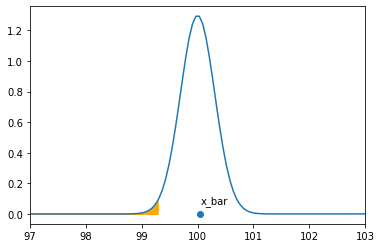

In [88]:
x_min = 97
x_max = 103

mean = pop_mean
std = pop_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.07))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

In [89]:
if(t < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [90]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.4353696075318674
Fail to reject Null Hypothesis
